In [96]:
import pandas as pd

df = pd.read_csv('vehiclefueleconomies.csv', low_memory=False)

In [97]:
mixed_type_columns_indices = [72, 74, 75, 77]

for column_index in mixed_type_columns_indices:
    column_name = df.columns[column_index]
    unique_values = df.iloc[:, column_index].unique()
    print(f"Column '{column_name}':")
    print(unique_values)
    print()

Column 'rangeA':
[nan '360' '290' '230/270/270' '240/290/290' '230/270' '240/280' '220/260'
 '220/270/260' '240/290/280' '300' '140' '310' '260' '120' '250/220/320'
 '230' '210' '270' '280' '110' '320' '290/340' '270/240/340' '310/390'
 '130' '280/380' '180' '170' '310/460' '310-540' '310/540' '310/330' '330'
 '310/480' '310/440' '340-400' '340-440' '310-410' '340' '370' '240'
 '340-350' '250' '280/370' '240-420' '250/370' '230/350' '290/410'
 '310/340' '310/320' '310/410' '350-370' '330-450' '310-420' '280-350'
 '310-340' '300-420' '310/370' '220' '260/320' '310/420' '330/450' '380'
 '410' '350' '337/451' '307/420' '347' '286/382' '308' '413' '329' '236'
 '214' '248' '262' '278' '279' '264' '303' '219' '344' '338' '277' '307'
 '295' '415' '383' '312' '304' '353' '328' '345' '265' '294' '366' '331'
 '354' '337' '282' '245' '35' '333' '292' '361' '314' '339' '238' '269'
 '302' '298' '273' '283' '346' '287' '318' '325' '288/351' '362' '337/406'
 '308/366' '361/501' '337/467' '339/469' '3

In [98]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (47075, 84)


In [99]:
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0          0        0.0      19      0.0        0   
1  27.046364         0.0          0        0.0       9      0.0        0   
2  11.018889         0.0          0        0.0      23      0.0        0   
3  27.046364         0.0          0        0.0      10      0.0        0   
4  15.658421         0.0          0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modif

In [100]:
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
          barrels08    barrelsA08  charge120     charge240        city08  \
count  47075.000000  47075.000000    47075.0  47075.000000  47075.000000   
mean      15.231677      0.191502        0.0      0.150331     19.433436   
std        4.422176      0.980411        0.0      1.177609     11.261053   
min        0.047081      0.000000        0.0      0.000000      6.000000   
25%       12.396250      0.000000        0.0      0.000000     15.000000   
50%       14.875500      0.000000        0.0      0.000000     18.000000   
75%       17.500588      0.000000        0.0      0.000000     21.000000   
max       42.501429     16.528333        0.0     19.000000    153.000000   

            city08U       cityA08      cityA08U        cityCD         cityE  \
count  47075.000000  47075.000000  47075.000000  47075.000000  47075.000000   
mean       8.609700      0.902751      0.778233      0.000505      0.855088   
std       15.204694      6.850386   

**Handling Missing Values**

In [101]:
print("Columns with missing values in the dataset:")
missing_columns = {}

for column in df.columns:
    missing_count = df[column].isnull().sum()
    if missing_count > 0:
        missing_columns[column] = missing_count

sorted_missing_columns = sorted(missing_columns.items(), key=lambda x: x[1])

for column, missing_count in sorted_missing_columns:
    print(f"{column}:          {missing_count} missing values")

Columns with missing values in the dataset:
trany:          11 missing values
displ:          650 missing values
cylinders:          652 missing values
drive:          1186 missing values
eng_dscr:          17306 missing values
mfrCode:          30808 missing values
startStop:          31689 missing values
trans_dscr:          32031 missing values
tCharger:          36954 missing values
atvType:          41979 missing values
guzzler:          44322 missing values
evMotor:          44858 missing values
fuelType2:          45184 missing values
rangeA:          45189 missing values
sCharger:          46072 missing values
c240Dscr:          46934 missing values
c240bDscr:          46940 missing values


In [102]:
columns_with_missing = ['trany', 'displ', 'drive']

df_cleaned = df.dropna(subset=columns_with_missing)
print("Shape of the cleaned DataFrame after dropping rows:", df_cleaned.shape)

Shape of the cleaned DataFrame after dropping rows: (45245, 84)


In [8]:
if 'EV' in df_cleaned['atvType'].unique():
    print("Type 'EV' exists in the 'atvType' column.")
else:
    print("Type 'EV' does not exist in the 'atvType' column.")

Type 'EV' exists in the 'atvType' column.


In [9]:
ev_df = df_cleaned[df_cleaned['atvType'] == 'EV']
print("Cylinder values where 'atvType' is 'EV':")
print(ev_df['cylinders'].unique())

Cylinder values where 'atvType' is 'EV':
[nan]


In [10]:
ev_null_cylinders = df_cleaned[(df_cleaned['atvType'] == 'EV') & (df_cleaned['cylinders'].isnull())]
df_cleaned.loc[(df_cleaned['atvType'] == 'EV') & (df_cleaned['cylinders'].isnull()), 'cylinders'] = 0

In [11]:
ev_df = df_cleaned[df_cleaned['atvType'] == 'EV']
print("Cylinder values where 'atvType' is 'EV':")
print(ev_df['cylinders'].unique())

Cylinder values where 'atvType' is 'EV':
[0.]


In [12]:
print("Distinct values in the 'cylinders' column:")
print(df_cleaned['cylinders'].unique())

Distinct values in the 'cylinders' column:
[ 4. 12.  8.  6.  5. 10.  2.  3. 16. nan  0.]


In [13]:
nan_cylinders_df = df_cleaned[df_cleaned['cylinders'].isnull()]
print("Values in the 'atvType' column where 'cylinders' is NaN:")
print(nan_cylinders_df['atvType'])

Values in the 'atvType' column where 'cylinders' is NaN:
21500    NaN
Name: atvType, dtype: object


In [14]:
print("Columns with missing values in the cleaned dataset (ascending order):")
missing_columns_cleaned = {}

for column in df_cleaned.columns:
    missing_count = df_cleaned[column].isnull().sum()
    if missing_count > 0:
        missing_columns_cleaned[column] = missing_count

sorted_missing_columns_cleaned = sorted(missing_columns_cleaned.items(), key=lambda x: x[1])

for column, missing_count in sorted_missing_columns_cleaned:
    print(f"{column}: {missing_count} missing values")324

Columns with missing values in the cleaned dataset (ascending order):
cylinders: 1 missing values
eng_dscr: 16636 missing values
mfrCode: 29600 missing values
trans_dscr: 30201 missing values
startStop: 30507 missing values
tCharger: 35245 missing values
atvType: 40891 missing values
guzzler: 42525 missing values
fuelType2: 43354 missing values
rangeA: 43359 missing values
evMotor: 43675 missing values
sCharger: 44242 missing values
c240Dscr: 45245 missing values
c240bDscr: 45245 missing values


In [15]:
df_cleaned.loc[:, 'eng_dscr'].fillna("Unknown", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\646937959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'eng_dscr'].fillna("Unknown", inplace=True)


In [16]:
miss_eng_dscr= df_cleaned['eng_dscr'].isnull().sum()
print(miss_eng_dscr)

0


In [17]:
df_cleaned.loc[:, 'mfrCode'].fillna("Unknown", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\1900481123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'mfrCode'].fillna("Unknown", inplace=True)


In [18]:
df_cleaned.loc[:, 'trans_dscr'].fillna("Unknown", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\288349485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'trans_dscr'].fillna("Unknown", inplace=True)


In [19]:
df_cleaned['startStop'].fillna("NA", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\1015112744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['startStop'].fillna("NA", inplace=True)


In [20]:
df_cleaned['tCharger'].fillna("No", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\453655101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tCharger'].fillna("No", inplace=True)


In [21]:
df_cleaned['atvType'].fillna("No Alt Fuel", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\3411278509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['atvType'].fillna("No Alt Fuel", inplace=True)


In [22]:
df_cleaned['guzzler'].fillna("NA", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\280808705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['guzzler'].fillna("NA", inplace=True)


In [23]:
print("Columns with missing values in the cleaned dataset (ascending order):")
missing_columns_cleaned = {}

for column in df_cleaned.columns:
    missing_count = df_cleaned[column].isnull().sum()
    if missing_count > 0:
        missing_columns_cleaned[column] = missing_count

sorted_missing_columns_cleaned = sorted(missing_columns_cleaned.items(), key=lambda x: x[1])

for column, missing_count in sorted_missing_columns_cleaned:
    print(f"{column}: {missing_count} missing values")

Columns with missing values in the cleaned dataset (ascending order):
cylinders: 1 missing values
fuelType2: 43354 missing values
rangeA: 43359 missing values
evMotor: 43675 missing values
sCharger: 44242 missing values
c240Dscr: 45245 missing values
c240bDscr: 45245 missing values


In [24]:
import pandas as pd

df_cleaned['rangeA'] = df_cleaned.groupby('fuelType2')['rangeA'].transform(lambda x: x.fillna(x.mode()[0]))
print("Number of missing values in 'rangeA' after filling:", df_cleaned['rangeA'].isnull().sum())

Number of missing values in 'rangeA' after filling: 43354


C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\2051490189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rangeA'] = df_cleaned.groupby('fuelType2')['rangeA'].transform(lambda x: x.fillna(x.mode()[0]))


In [25]:
df_cleaned['fuelType2'].fillna("NA", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\3198119890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['fuelType2'].fillna("NA", inplace=True)


In [26]:
print("Datatype of the 'rangeA' column:", df_cleaned['rangeA'].dtype)

Datatype of the 'rangeA' column: object


In [27]:
import numpy as np

def calculate_mean(string):
    numbers = [int(num) for num in string.replace('/', '-').split('-') if num.isdigit()]
    return np.mean(numbers) if numbers else np.nan

df_cleaned['rangeA'] = df_cleaned['rangeA'].apply(lambda x: calculate_mean(str(x)))
print(df_cleaned['rangeA'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
47070   NaN
47071   NaN
47072   NaN
47073   NaN
47074   NaN
Name: rangeA, Length: 45245, dtype: float64


C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\910048589.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rangeA'] = df_cleaned['rangeA'].apply(lambda x: calculate_mean(str(x)))


In [28]:
distinct_values_rangeA = df_cleaned['rangeA'].unique()
print("Distinct values in the 'rangeA' column:")
print(distinct_values_rangeA)

Distinct values in the 'rangeA' column:
[         nan 360.         290.         256.66666667 273.33333333
 250.         260.         240.         270.         300.
 140.         310.         120.         263.33333333 230.
 210.         280.         110.         320.         315.
 283.33333333 350.         130.         330.         180.
 170.         385.         425.         395.         375.
 370.         390.         340.         345.         325.
 365.         220.         380.         410.         394.
 363.5        347.         334.         308.         413.
 329.         236.         214.         248.         262.
 278.         279.         264.         303.         219.
 344.         338.         277.         307.         295.
 415.         383.         312.         304.         353.
 328.         265.         294.         366.         331.
 354.         337.         282.         245.          35.
 333.         292.         361.         314.         339.
 238.         269.      

In [29]:
nan_count_rangeA = df_cleaned['rangeA'].isna().sum()
print("Number of elements with the value NaN in 'rangeA':", nan_count_rangeA)

Number of elements with the value NaN in 'rangeA': 43354


In [30]:
df_cleaned['rangeA'].fillna(0, inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\3183100873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rangeA'].fillna(0, inplace=True)


In [31]:
nullinrangeA=df_cleaned['rangeA'].isnull().sum().sum()
print(nullinrangeA)

0


In [32]:
print("Columns with missing values in the cleaned dataset (ascending order):")
missing_columns_cleaned = {}

for column in df_cleaned.columns:
    missing_count = df_cleaned[column].isnull().sum()
    if missing_count > 0:
        missing_columns_cleaned[column] = missing_count

# Sort the dictionary by values (missing counts)
sorted_missing_columns_cleaned = sorted(missing_columns_cleaned.items(), key=lambda x: x[1])

# Print the columns with missing values in ascending order
for column, missing_count in sorted_missing_columns_cleaned:
    print(f"{column}: {missing_count} missing values")

Columns with missing values in the cleaned dataset (ascending order):
cylinders: 1 missing values
evMotor: 43675 missing values
sCharger: 44242 missing values
c240Dscr: 45245 missing values
c240bDscr: 45245 missing values


In [33]:
distinct_values_atvType = df_cleaned['atvType'].unique()
print("Distinct values in the 'atvType' column:")
print(distinct_values_atvType)

Distinct values in the 'atvType' column:
['No Alt Fuel' 'Diesel' 'Hybrid' 'Bifuel (CNG)' 'CNG' 'FFV' 'Bifuel (LPG)'
 'Plug-in Hybrid' 'EV']


In [34]:
filtered_df = df_cleaned[df_cleaned['atvType'].isin(['Hybrid', 'Plug-in Hybrid', 'EV'])]

null_evMotor_count = filtered_df['evMotor'].isnull().sum()

print("Number of null values in 'evMotor' column where atvType values are 'Hybrid', 'Plug-in Hybrid', or 'EV':", null_evMotor_count)

Number of null values in 'evMotor' column where atvType values are 'Hybrid', 'Plug-in Hybrid', or 'EV': 77


In [35]:
from scipy.stats import mode

hybrid_mode = df_cleaned[df_cleaned['atvType'] == 'Hybrid']['evMotor'].mode()[0]

df_cleaned.loc[(df_cleaned['atvType'] == 'Hybrid') & (df_cleaned['evMotor'].isnull()), 'evMotor'] = hybrid_mode

In [37]:
from scipy.stats import mode

pluginhybrid_mode = df_cleaned[df_cleaned['atvType'] == 'Plug-in Hybrid']['evMotor'].mode()[0]

df_cleaned.loc[(df_cleaned['atvType'] == 'Plug-in Hybrid') & (df_cleaned['evMotor'].isnull()), 'evMotor'] = pluginhybrid_mode

In [39]:
null_evMotor_count = df_cleaned[(df_cleaned['atvType'] == 'EV') & (df_cleaned['evMotor'].isnull())]['evMotor'].count()
print("Number of null values in 'evMotor' where 'atvType' is 'EV':", null_evMotor_count)

Number of null values in 'evMotor' where 'atvType' is 'EV': 0


In [40]:
ev_df = df_cleaned[df_cleaned['atvType'] == 'EV']

print("Values of the 'evMotor' column where 'atvType' is 'EV':")
print(ev_df['evMotor'])

Values of the 'evMotor' column where 'atvType' is 'EV':
28577    49 kW DCPM
Name: evMotor, dtype: object


In [41]:
if 'EV' in df_cleaned['atvType'].unique():
    print("Type 'EV' exists in the 'atvType' column.")
else:
    print("Type 'EV' does not exist in the 'atvType' column.")

Type 'EV' exists in the 'atvType' column.


In [42]:
print("Columns with missing values in the cleaned dataset (ascending order):")
missing_columns_cleaned = {}

for column in df_cleaned.columns:
    missing_count = df_cleaned[column].isnull().sum()
    if missing_count > 0:
        missing_columns_cleaned[column] = missing_count

sorted_missing_columns_cleaned = sorted(missing_columns_cleaned.items(), key=lambda x: x[1])

for column, missing_count in sorted_missing_columns_cleaned:
    print(f"{column}: {missing_count} missing values")

Columns with missing values in the cleaned dataset (ascending order):
cylinders: 1 missing values
evMotor: 43598 missing values
sCharger: 44242 missing values
c240Dscr: 45245 missing values
c240bDscr: 45245 missing values


In [43]:
print("Distinct values in the 'atvType' column:")
print(df_cleaned['atvType'].unique())

Distinct values in the 'atvType' column:
['No Alt Fuel' 'Diesel' 'Hybrid' 'Bifuel (CNG)' 'CNG' 'FFV' 'Bifuel (LPG)'
 'Plug-in Hybrid' 'EV']


In [44]:
atvType_null_cylinders = df_cleaned[df_cleaned['cylinders'].isnull()]['atvType']

print("Values of 'atvType' where 'cylinders' is null:")
print(atvType_null_cylinders)

Values of 'atvType' where 'cylinders' is null:
21500    No Alt Fuel
Name: atvType, dtype: object


In [45]:
no_alt_fuel_count = (df_cleaned['atvType'] == 'No Alt Fuel').sum()
print("Number of values with 'No Alt Fuel' in the 'atvType' column:", no_alt_fuel_count)

Number of values with 'No Alt Fuel' in the 'atvType' column: 40891


In [46]:
null_cylinder_count = df_cleaned['cylinders'].isnull().sum()
print("Number of null values in the 'cylinder' column:", null_cylinder_count)

Number of null values in the 'cylinder' column: 1


In [47]:
df_cleaned['cylinders'].fillna(0, inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\2521254426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cylinders'].fillna(0, inplace=True)


In [48]:
null_cylinder_count = df_cleaned['cylinders'].isnull().sum()
print("Number of null values in the 'cylinder' column:", null_cylinder_count)

Number of null values in the 'cylinder' column: 0


In [50]:
df_cleaned['evMotor'].fillna("NA", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\1526608643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['evMotor'].fillna("NA", inplace=True)


In [51]:
df_cleaned.drop(columns=['c240Dscr', 'c240bDscr'], inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\3840396074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['c240Dscr', 'c240bDscr'], inplace=True)


In [52]:
df_cleaned['sCharger'].fillna("NA", inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_14340\2501948491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sCharger'].fillna("NA", inplace=True)


In [53]:
print("Number of null values in each column:")
for column in df_cleaned.columns:
    null_count = df_cleaned[column].isnull().sum()
    print(f"{column}:           {null_count} missing values")

Number of null values in each column:
barrels08:           0 missing values
barrelsA08:           0 missing values
charge120:           0 missing values
charge240:           0 missing values
city08:           0 missing values
city08U:           0 missing values
cityA08:           0 missing values
cityA08U:           0 missing values
cityCD:           0 missing values
cityE:           0 missing values
cityUF:           0 missing values
co2:           0 missing values
co2A:           0 missing values
co2TailpipeAGpm:           0 missing values
co2TailpipeGpm:           0 missing values
comb08:           0 missing values
comb08U:           0 missing values
combA08:           0 missing values
combA08U:           0 missing values
combE:           0 missing values
combinedCD:           0 missing values
combinedUF:           0 missing values
cylinders:           0 missing values
displ:           0 missing values
drive:           0 missing values
engId:           0 missing values
eng_dscr:    

**Distribution of City MPG for FuelType1 using a Histogram**

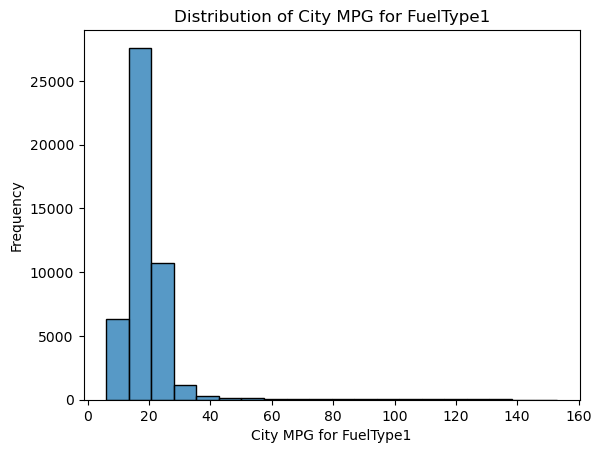

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='city08', bins=20)
plt.xlabel('City MPG for FuelType1')
plt.ylabel('Frequency')
plt.title('Distribution of City MPG for FuelType1')
plt.savefig('city_mpg_distribution.png')
plt.show()

**Scatter Plot for Annual Petroleum Consumption vs CO2 Emissions (FuelType1)**

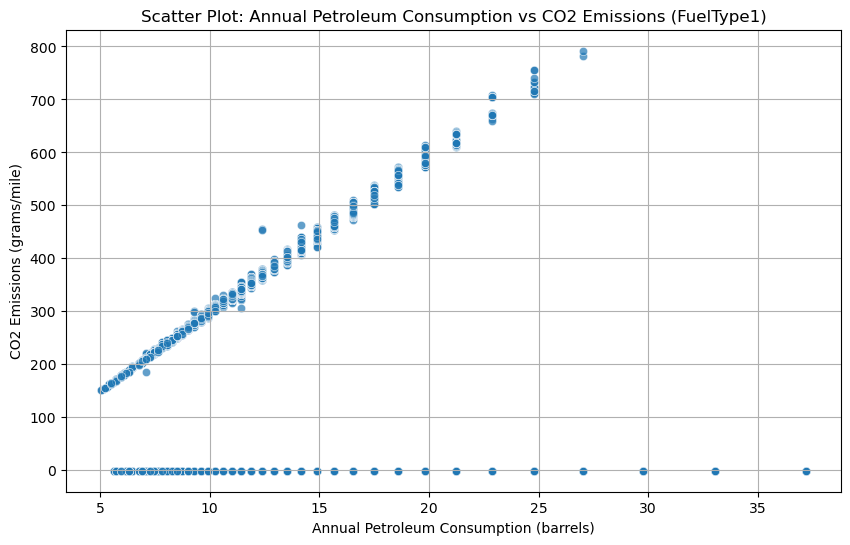

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

fuelType1_data = df[df['fuelType'] == 'Regular']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fuelType1_data, x='barrels08', y='co2', alpha=0.7)
plt.title('Scatter Plot: Annual Petroleum Consumption vs CO2 Emissions (FuelType1)')
plt.xlabel('Annual Petroleum Consumption (barrels)')
plt.ylabel('CO2 Emissions (grams/mile)')
plt.grid(True)
plt.show()

**Line plot for potraying the relationship between Charge Time at 240V and Combined Electricity Consumption**

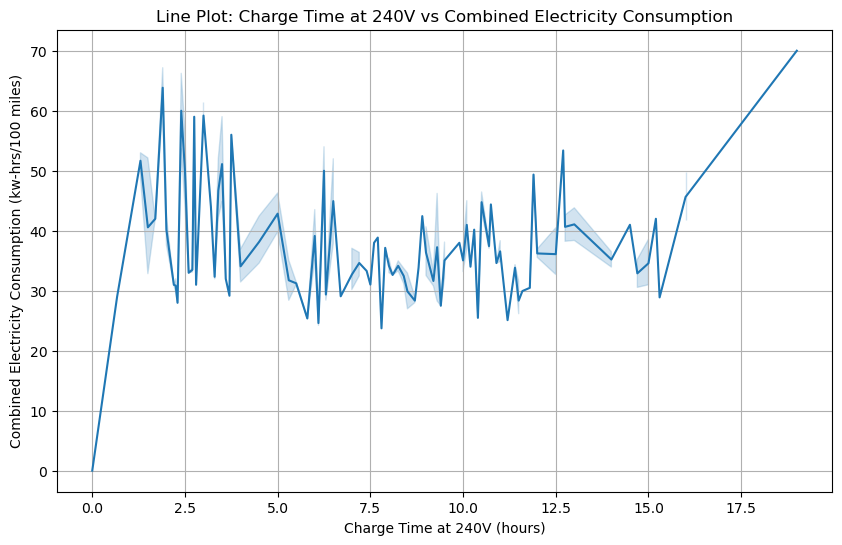

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='charge240', y='combE')
plt.title('Line Plot: Charge Time at 240V vs Combined Electricity Consumption')
plt.xlabel('Charge Time at 240V (hours)')
plt.ylabel('Combined Electricity Consumption (kw-hrs/100 miles)')
plt.grid(True)
plt.show()

In [57]:
import pandas as pd

df['year'] = pd.to_datetime(df['year'], format='%Y')

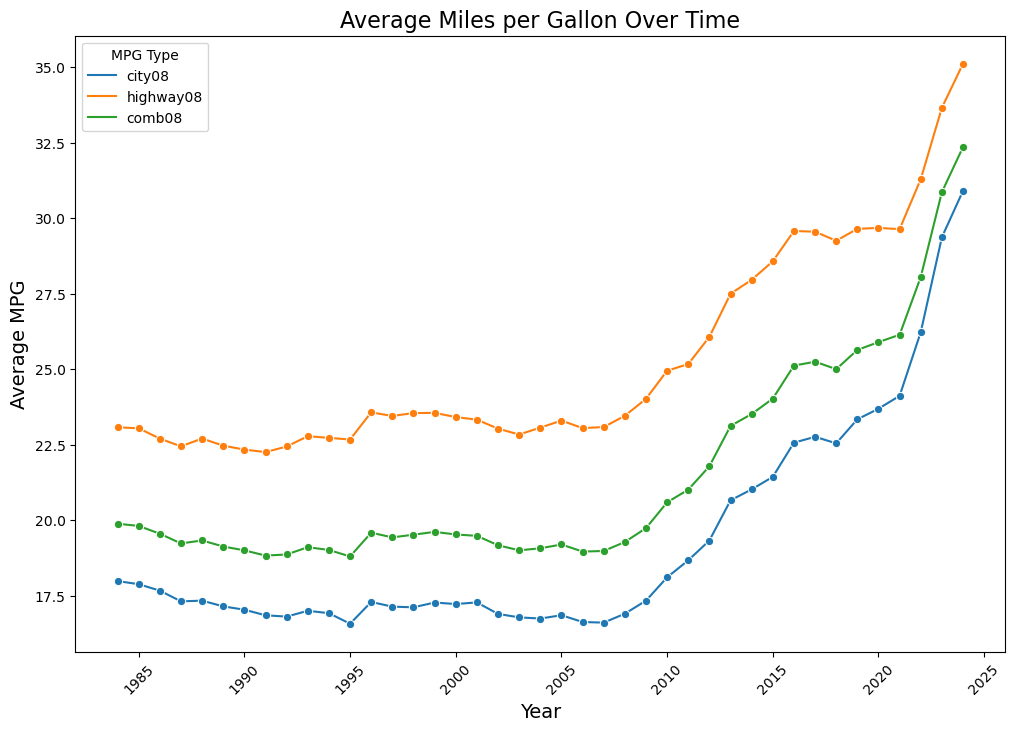

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_mpg_year = df.groupby('year')[['city08', 'highway08', 'comb08']].mean().reset_index()
avg_mpg_year_melted = avg_mpg_year.melt(id_vars='year', var_name='MPG Type', value_name='Average MPG')

plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_mpg_year_melted, x='year', y='Average MPG', hue='MPG Type', marker='o')
plt.title('Average Miles per Gallon Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average MPG', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='MPG Type')
plt.savefig('average_mpg_over_time.png')
plt.show()

**Pair Plot of Fuel Efficiency and Emissions Variables**

C:\Users\prabh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

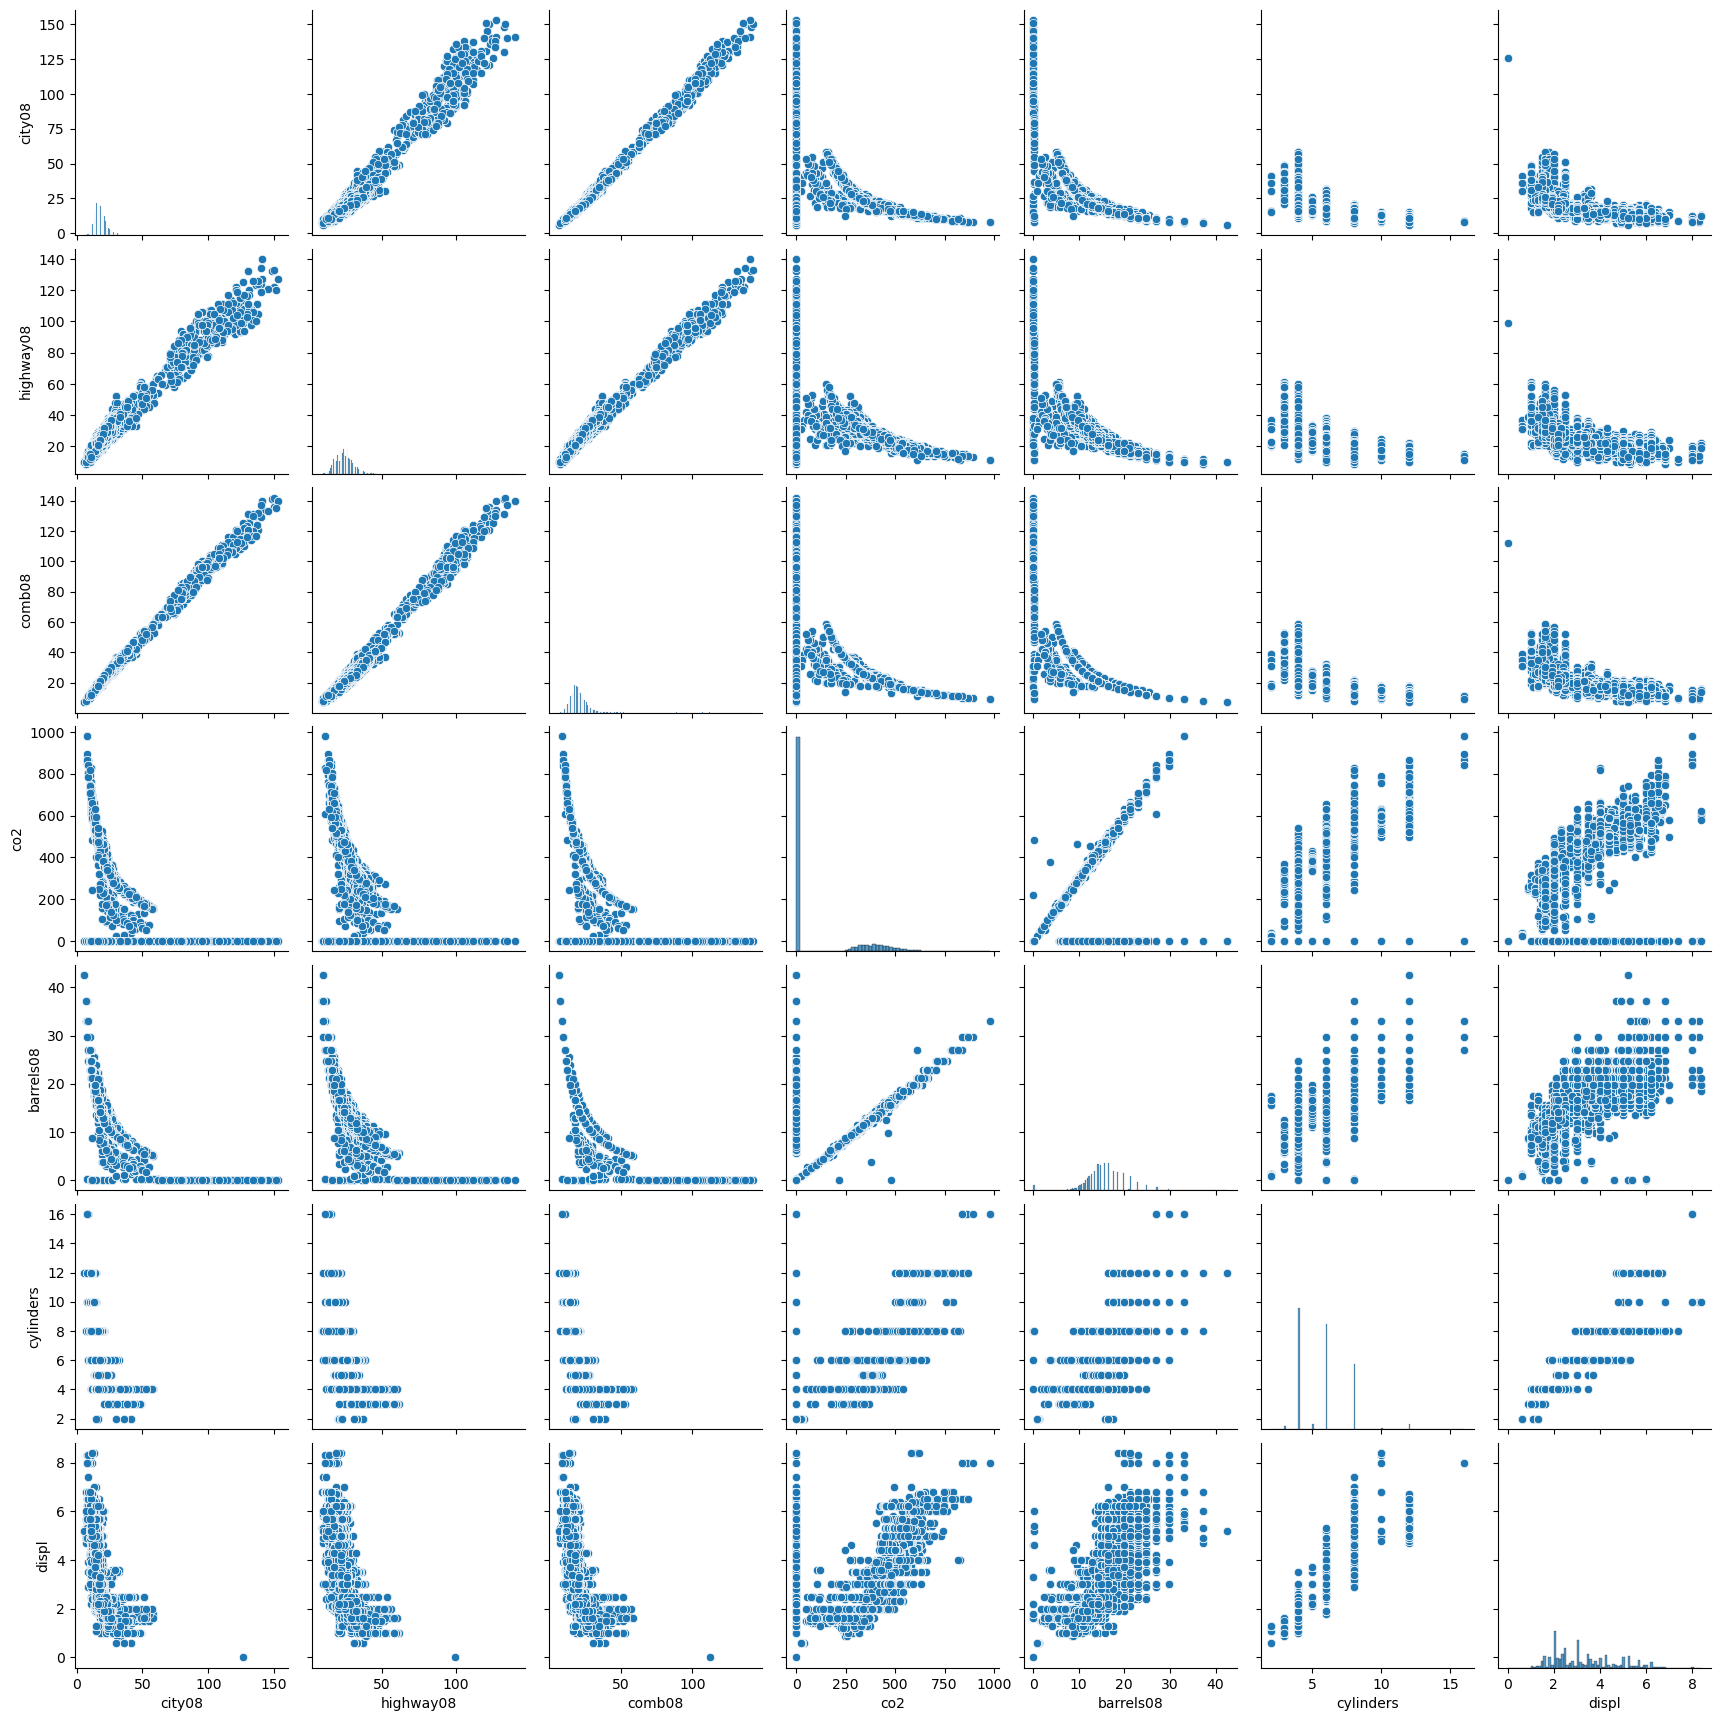

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['city08', 'highway08', 'comb08', 'co2', 'barrels08', 'cylinders', 'displ']

plt.tight_layout()
sns.pairplot(df[numerical_columns])
plt.show()

**Correlation Heatmap of the Engine Specifications and Performance**

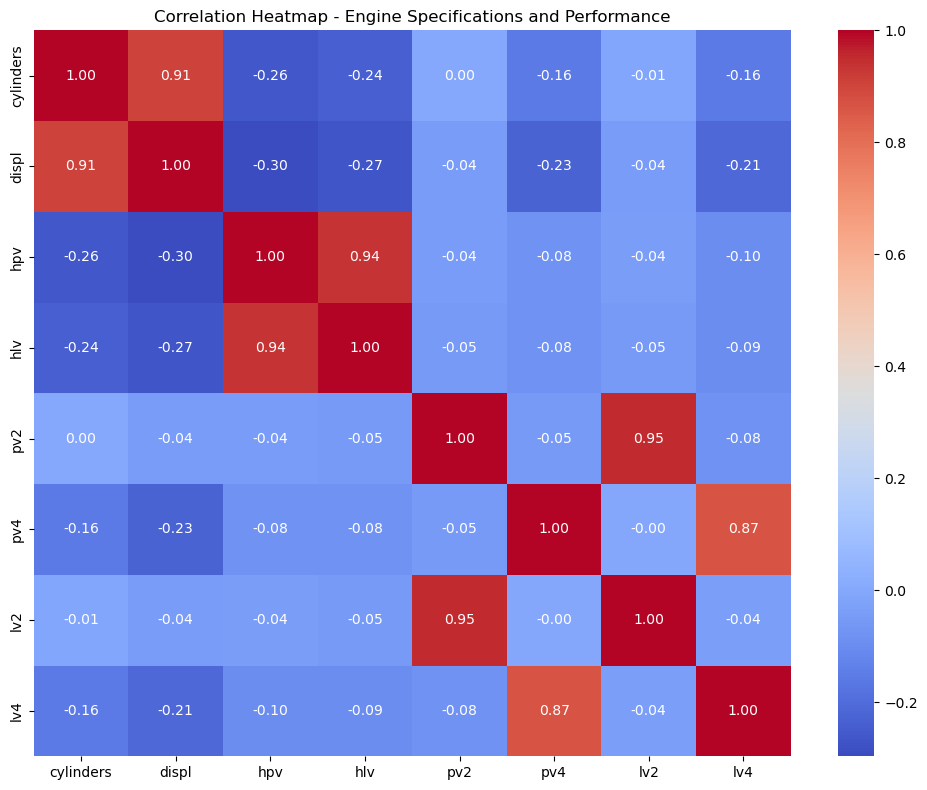

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

selected_columns = ['cylinders', 'displ', 'hpv', 'hlv', 'pv2', 'pv4', 'lv2', 'lv4']
engine_data = df[selected_columns]
correlation_matrix = engine_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Engine Specifications and Performance')
plt.tight_layout()
plt.show()

**Bar Plot of Gas Guzzler Tax Comparison**

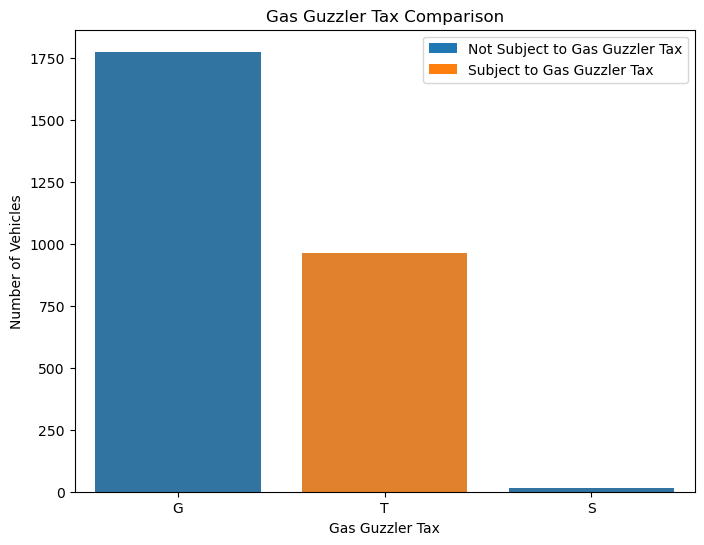

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

guzzler_counts = df['guzzler'].value_counts()
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 6))
sns.barplot(x=guzzler_counts.index, y=guzzler_counts.values, palette=colors)
plt.xlabel('Gas Guzzler Tax')
plt.ylabel('Number of Vehicles')
plt.title('Gas Guzzler Tax Comparison')
legend_labels = ['Not Subject to Gas Guzzler Tax', 'Subject to Gas Guzzler Tax']
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in colors]
plt.legend(legend_patches, legend_labels)
plt.show()

Note: The entries marked as S are also subject to Gas Guzzler Tax

**Violin Plot of Fuel Efficiency Comparison by Fuel Type**

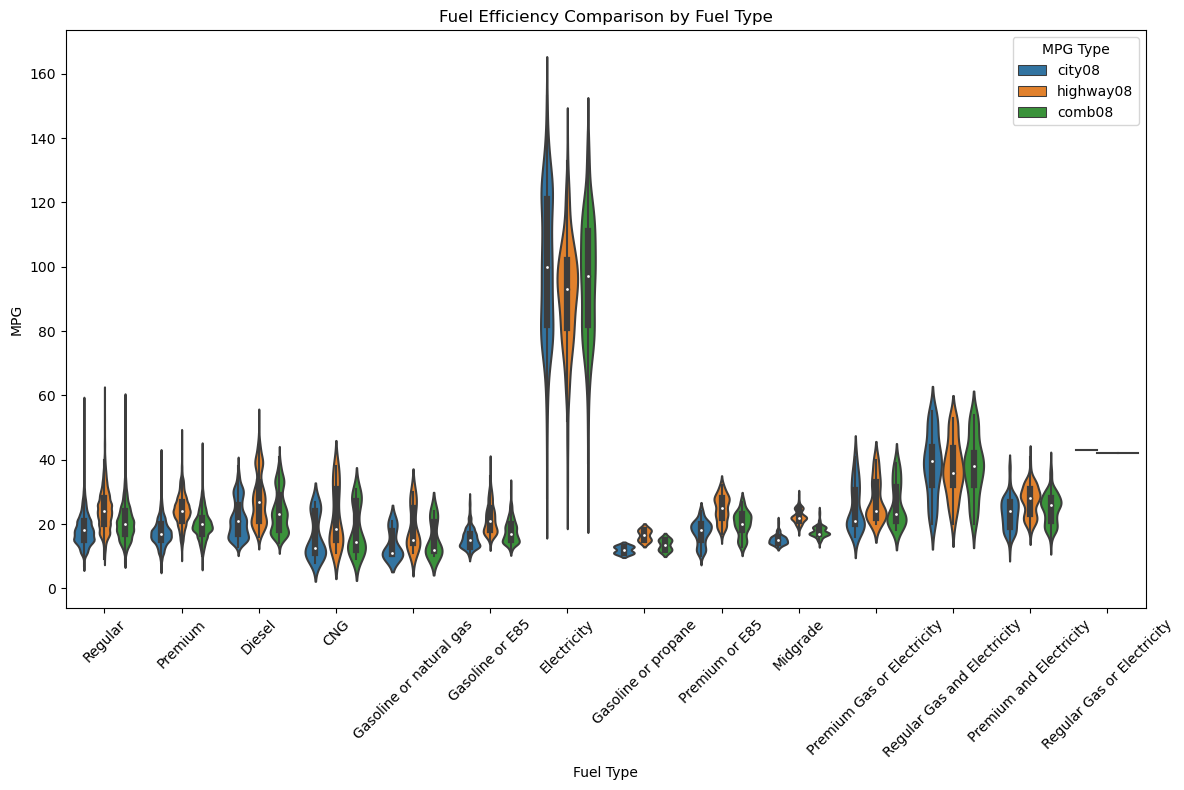

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[(df['city08'] != -1) & (df['highway08'] != -1) & (df['comb08'] != -1)]
mpg_data = filtered_df[['fuelType', 'city08', 'highway08', 'comb08']]
mpg_data = pd.melt(mpg_data, id_vars='fuelType', var_name='MPG_Type', value_name='MPG')

plt.figure(figsize=(12, 8))
sns.violinplot(data=mpg_data, x='fuelType', y='MPG', hue='MPG_Type')
plt.xlabel('Fuel Type')
plt.ylabel('MPG')
plt.title('Fuel Efficiency Comparison by Fuel Type')
plt.legend(title='MPG Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('fuel_efficiency_comparison.png')
plt.show()

**Plotting Battery Performance Analysis Over Time using a Line Chart**

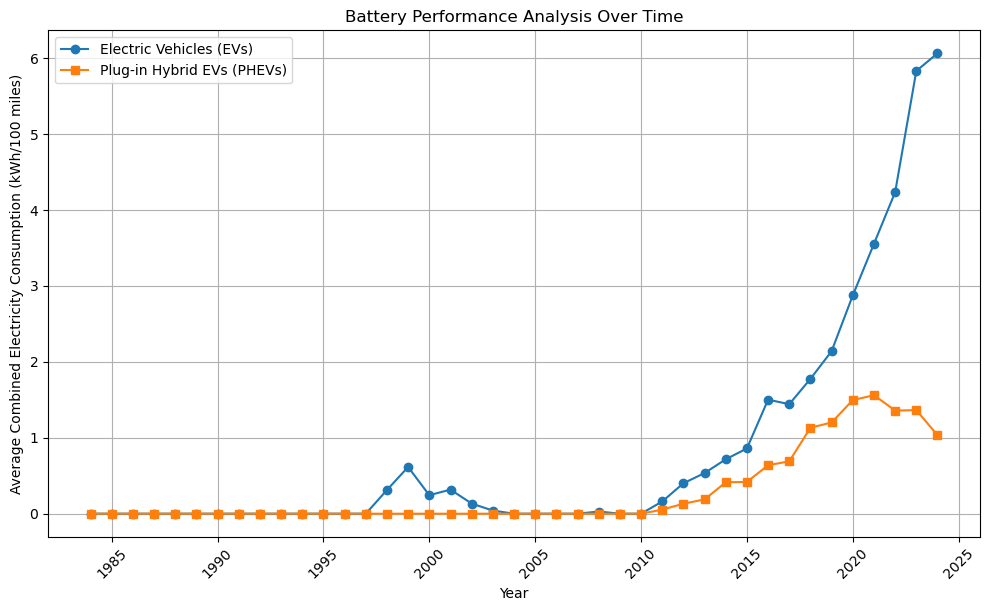

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

battery_performance = df.groupby('year')[['combE', 'phevComb']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(battery_performance['year'], battery_performance['combE'], label='Electric Vehicles (EVs)', marker='o')
plt.plot(battery_performance['year'], battery_performance['phevComb'], label='Plug-in Hybrid EVs (PHEVs)', marker='s')
plt.xlabel('Year')
plt.ylabel('Average Combined Electricity Consumption (kWh/100 miles)')
plt.title('Battery Performance Analysis Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Top 10 Electric Vehicle Manufacturers Market Share Over Time**

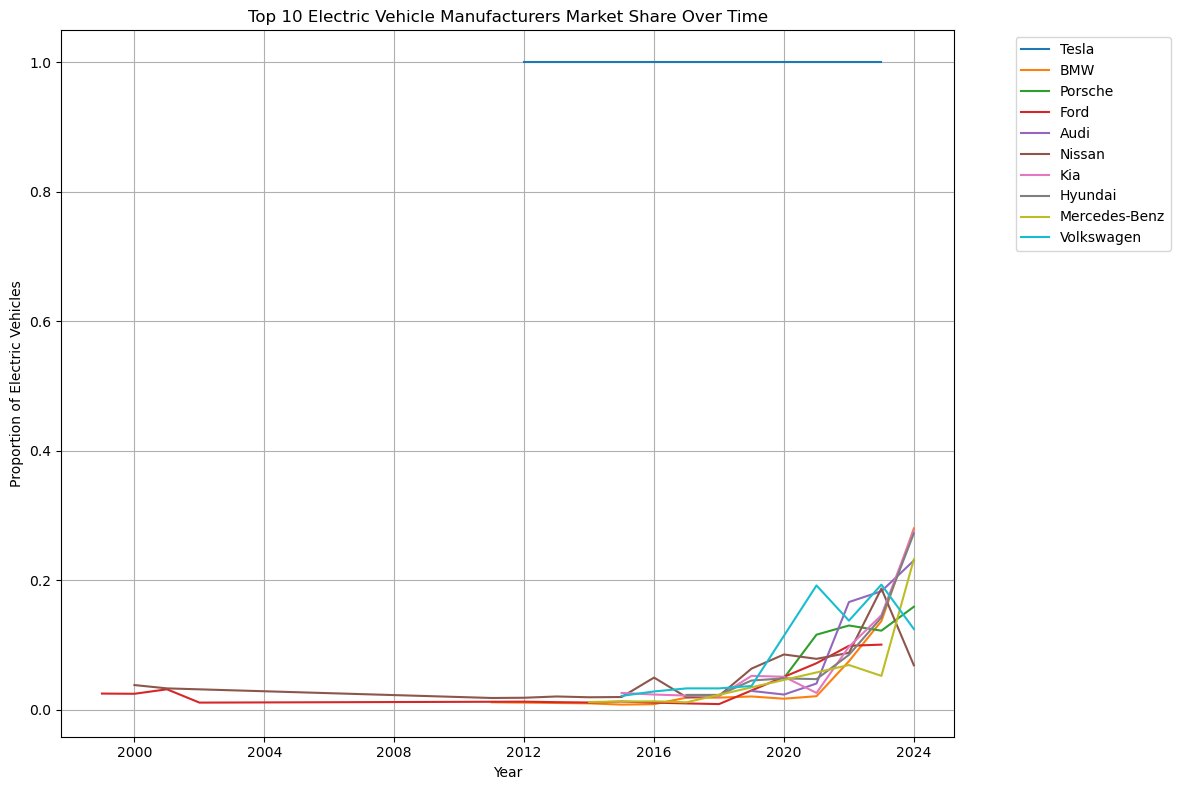

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df[df['fuelType'] == 'Electricity'].groupby(['year', 'make']).size().reset_index(name='EV_Count')
total_production = df.groupby(['year', 'make']).size().reset_index(name='Total_Count')
merged_data = pd.merge(grouped, total_production, on=['year', 'make'])
merged_data['EV_Proportion'] = merged_data['EV_Count'] / merged_data['Total_Count']
top_10_manufacturers = merged_data.groupby('make')['EV_Count'].sum().nlargest(10).index
top_10_data = merged_data[merged_data['make'].isin(top_10_manufacturers)]

plt.figure(figsize=(12, 8))
for make in top_10_manufacturers:
    plt.plot(top_10_data[top_10_data['make'] == make]['year'], 
             top_10_data[top_10_data['make'] == make]['EV_Proportion'], 
             label=make)

plt.xlabel('Year')
plt.ylabel('Proportion of Electric Vehicles')
plt.title('Top 10 Electric Vehicle Manufacturers Market Share Over Time')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

**Count plot of Gas Guzzler Vehicles by Manufacturer**

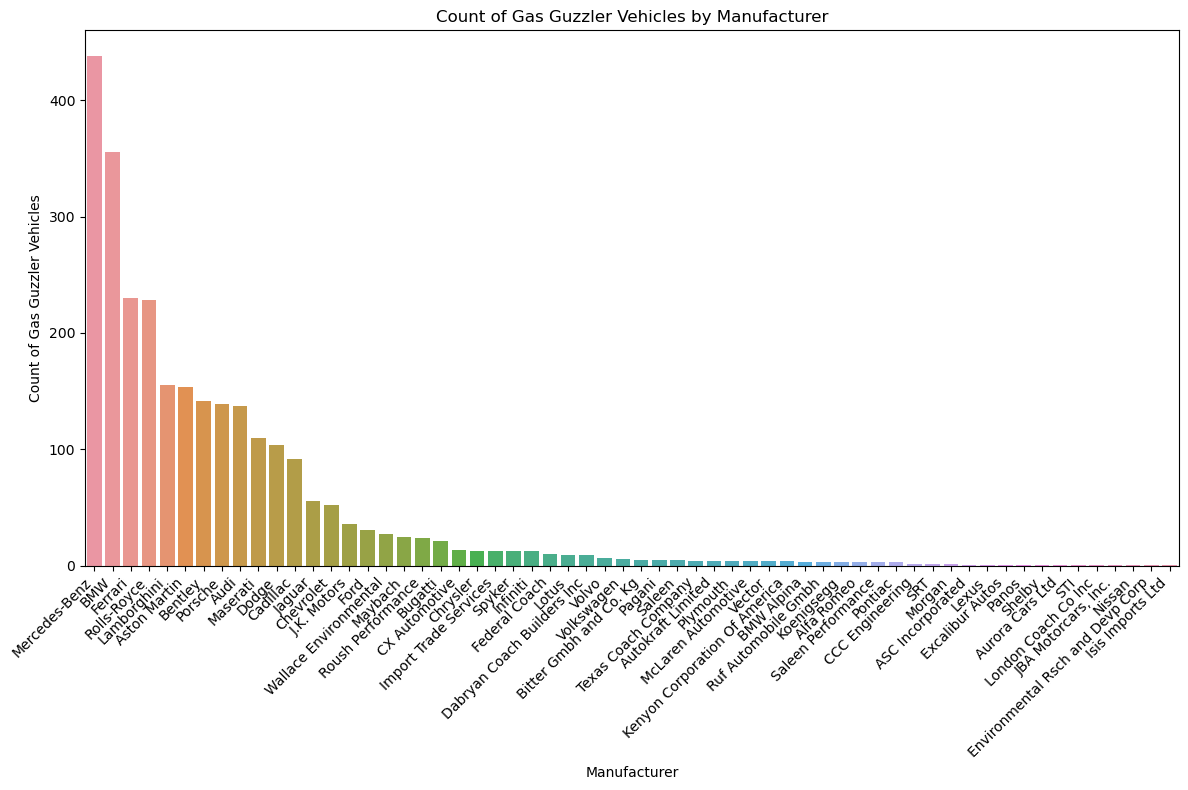

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

guzzler_data = df[df['guzzler'].isin(['G', 'T'])]

plt.figure(figsize=(12, 8))
sns.countplot(data=guzzler_data, x='make', order=guzzler_data['make'].value_counts().index)
plt.xlabel('Manufacturer')
plt.ylabel('Count of Gas Guzzler Vehicles')
plt.title('Count of Gas Guzzler Vehicles by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Comparison of Passenger and Luggage Volumes using a Scatterplot**

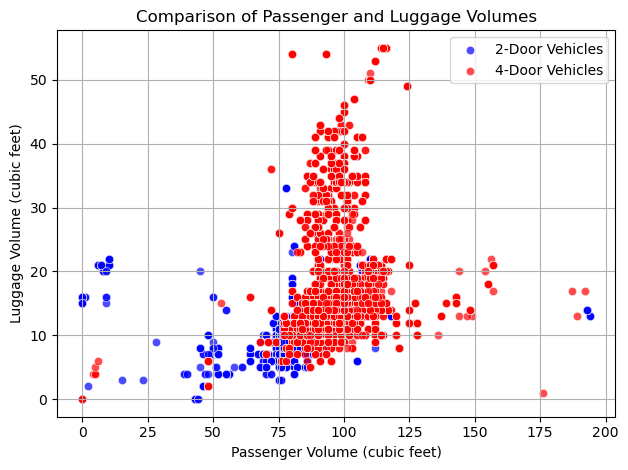

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df.dropna(subset=['pv2', 'pv4', 'lv2', 'lv4'])

sns.scatterplot(data=filtered_df, x='pv2', y='lv2', label='2-Door Vehicles', alpha=0.7, color='blue')
sns.scatterplot(data=filtered_df, x='pv4', y='lv4', label='4-Door Vehicles', alpha=0.7, color='red')

plt.xlabel('Passenger Volume (cubic feet)')
plt.ylabel('Luggage Volume (cubic feet)')
plt.title('Comparison of Passenger and Luggage Volumes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()